In [59]:
# Importation des bibliothèques python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [60]:
# Importation du dataset sur les cancers du sein
data = pd.read_csv("./Data/breats_cancer_data.csv", sep=",")

# Affichage du dataset
data

,Age,operation_year,nb_positive_nodes_detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Attribute Information:
   1. Age = Age of patient at time of operation (numerical)
   2. operation_year = Patient's year of operation (year - 1900, numerical)
   3. nb_positive_nodes_detected = Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         - 1 = the patient survived 5 years or longer
         - 2 = the patient died within 5 year

              Age   operation_year   nb_positive_nodes_detected  \
count  306.000000       306.000000                   306.000000   
mean    52.457516        62.852941                     4.026144   
std     10.803452         3.249405                     7.189654   
min     30.000000        58.000000                     0.000000   
25%     44.000000        60.000000                     0.000000   
50%     52.000000        63.000000                     1.000000   
75%     60.750000        65.750000                     4.000000   
max     83.000000        69.000000                    52.000000   

        Survival status  
count        306.000000  
mean           1.264706  
std            0.441899  
min            1.000000  
25%            1.000000  
50%            1.000000  
75%            2.000000  
max            2.000000  


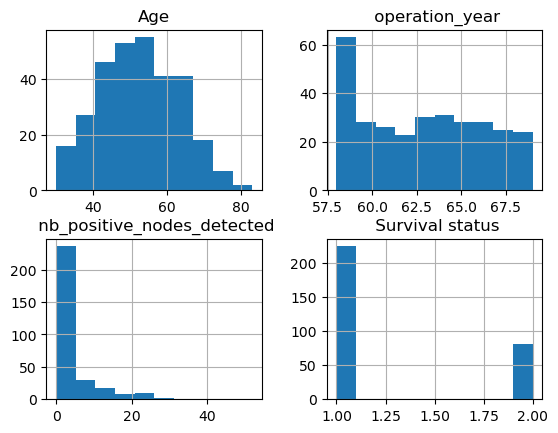

In [61]:
# show summary statistics
print(data.describe())

# plot histograms
data.hist()
plt.show()

In [62]:
# Création d'une copie du dataset + renommage des colonnes
df = data.copy()
columns = ['age', 'year', 'nodes', 'class']
df.columns = columns

# Résumé de la distribution des classes (1 = survie 5+ ans post-opération, 2 = meurt ds 5 ans suivant l'opération)
target = df['class'].values
counter = Counter(target)
for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


In [63]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))

In [64]:
# predict test set
yhat = np.where(model.predict(X_test) > 0.5, 1, 0)

# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

5/5 [==============================] - 0s 1ms/step
Accuracy: 0.732


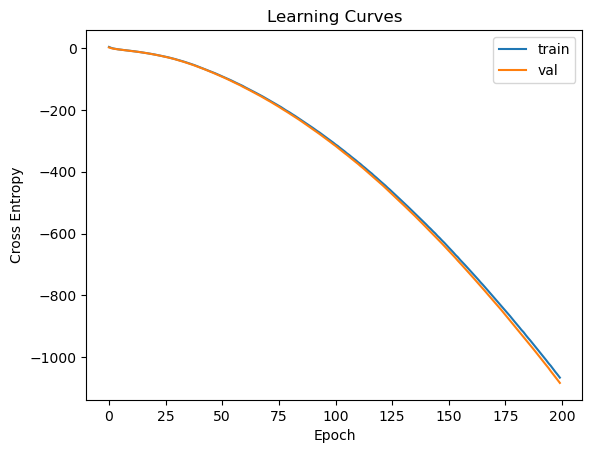

In [65]:
# plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [66]:
# prepare cross validation
kfold = StratifiedKFold(10)
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # determine the number of input features
    n_features = X.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu',
              kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy')
    # fit the model
    model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
    # predict test set
    yhat = np.where(model.predict(X_test) > 0.5, 1, 0)
    # evaluate predictions
    score = accuracy_score(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

1/1 [==============================] - 0s 53ms/step
>0.742
1/1 [==============================] - 0s 66ms/step
>0.742
1/1 [==============================] - 0s 48ms/step
>0.742
1/1 [==============================] - 0s 45ms/step
>0.742
1/1 [==============================] - 0s 50ms/step
>0.742
1/1 [==============================] - 0s 49ms/step
>0.710
1/1 [==============================] - 0s 46ms/step
>0.733
1/1 [==============================] - 0s 90ms/step
>0.733
1/1 [==============================] - 0s 49ms/step
>0.733
1/1 [==============================] - 0s 58ms/step
>0.733
Mean Accuracy: 0.735 (0.009)


In [67]:
# encode strings to integer
le = LabelEncoder()
y = le.fit_transform(y)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=200, batch_size=16, verbose=0)

# define a row of new data
row = [30,64,1]

# make prediction
yhat = np.where(model.predict([row]) > 0.5, 1, 0)

# invert transform to get label for class
yhat = le.inverse_transform(yhat)

# report prediction
print('Predicted: %s' % (yhat[0]))

1/1 [==============================] - 0s 67ms/step
Predicted: 1


c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5/5 [==============================] - 0s 2ms/step
Accuracy: 0.765


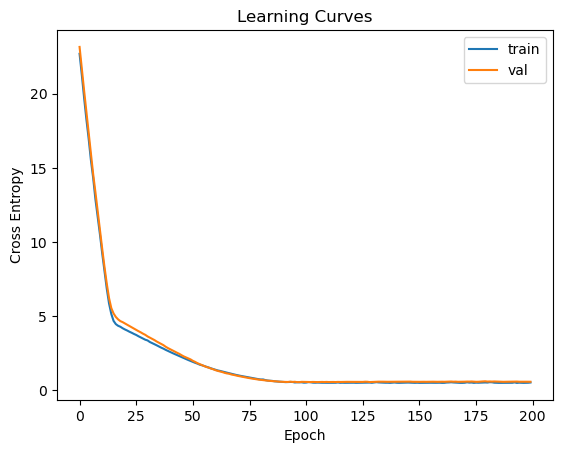

In [71]:
# fit a simple mlp model on the haberman and review learning curves
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_test,y_test))
# predict test set
yhat = (model.predict(X_test) > 0.5).astype("int32")
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()